### Explorative Analyse der Smartmeter Daten

In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

from data_loader import smartmeter_load
import seaborn as sns
import matplotlib as plt
import polars as pl

In [2]:
smart_meter = smartmeter_load(data_path ='../data/raw/households')
smart_meter.describe()

statistic,timestamp,timestamp_local,date,household_id,group_assignment,affects_timepoint,kwh_received_total,kwh_received_heatpump,kwh_received_other,kwh_returned_total
str,str,str,str,str,str,str,f64,f64,f64,f64
"""count""","""936026""","""936026""","""936026""","""936026""","""936026""","""936026""",916807.0,35694.0,29075.0,230402.0
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""",19219.0,900332.0,906951.0,705624.0
"""mean""","""2022-04-12 11:46:29.668635+00:…","""2022-04-12 13:46:29.668635+02:…","""2022-04-12 11:46:30.668635""",null,null,null,27.785552,21.378717,20.821304,17.992046
"""std""",null,null,null,null,null,null,23.272086,29.524287,20.726929,21.587601
"""min""","""2018-11-02 23:59:59+00:00""","""2018-11-03 00:59:59+01:00""","""2018-11-03""","""100101""","""control""","""after visit""",0.01,0.01,0.3,0.01
"""25%""","""2021-03-17 23:59:59+00:00""","""2021-03-18 00:59:59+01:00""","""2021-03-18""",null,null,null,12.6,5.56,9.3,1.27
"""50%""","""2022-08-30 23:59:59+00:00""","""2022-08-31 01:59:59+02:00""","""2022-08-31""",null,null,null,22.48,13.85,14.95,10.18
"""75%""","""2023-06-18 23:59:59+00:00""","""2023-06-19 01:59:59+02:00""","""2023-06-19""",null,null,null,37.09,28.08,23.63,27.7
"""max""","""2024-03-20 23:59:59+00:00""","""2024-03-21 00:59:59+01:00""","""2024-03-21""","""998181""","""treatment""","""unknown""",4689.98,401.96,171.97,223.36


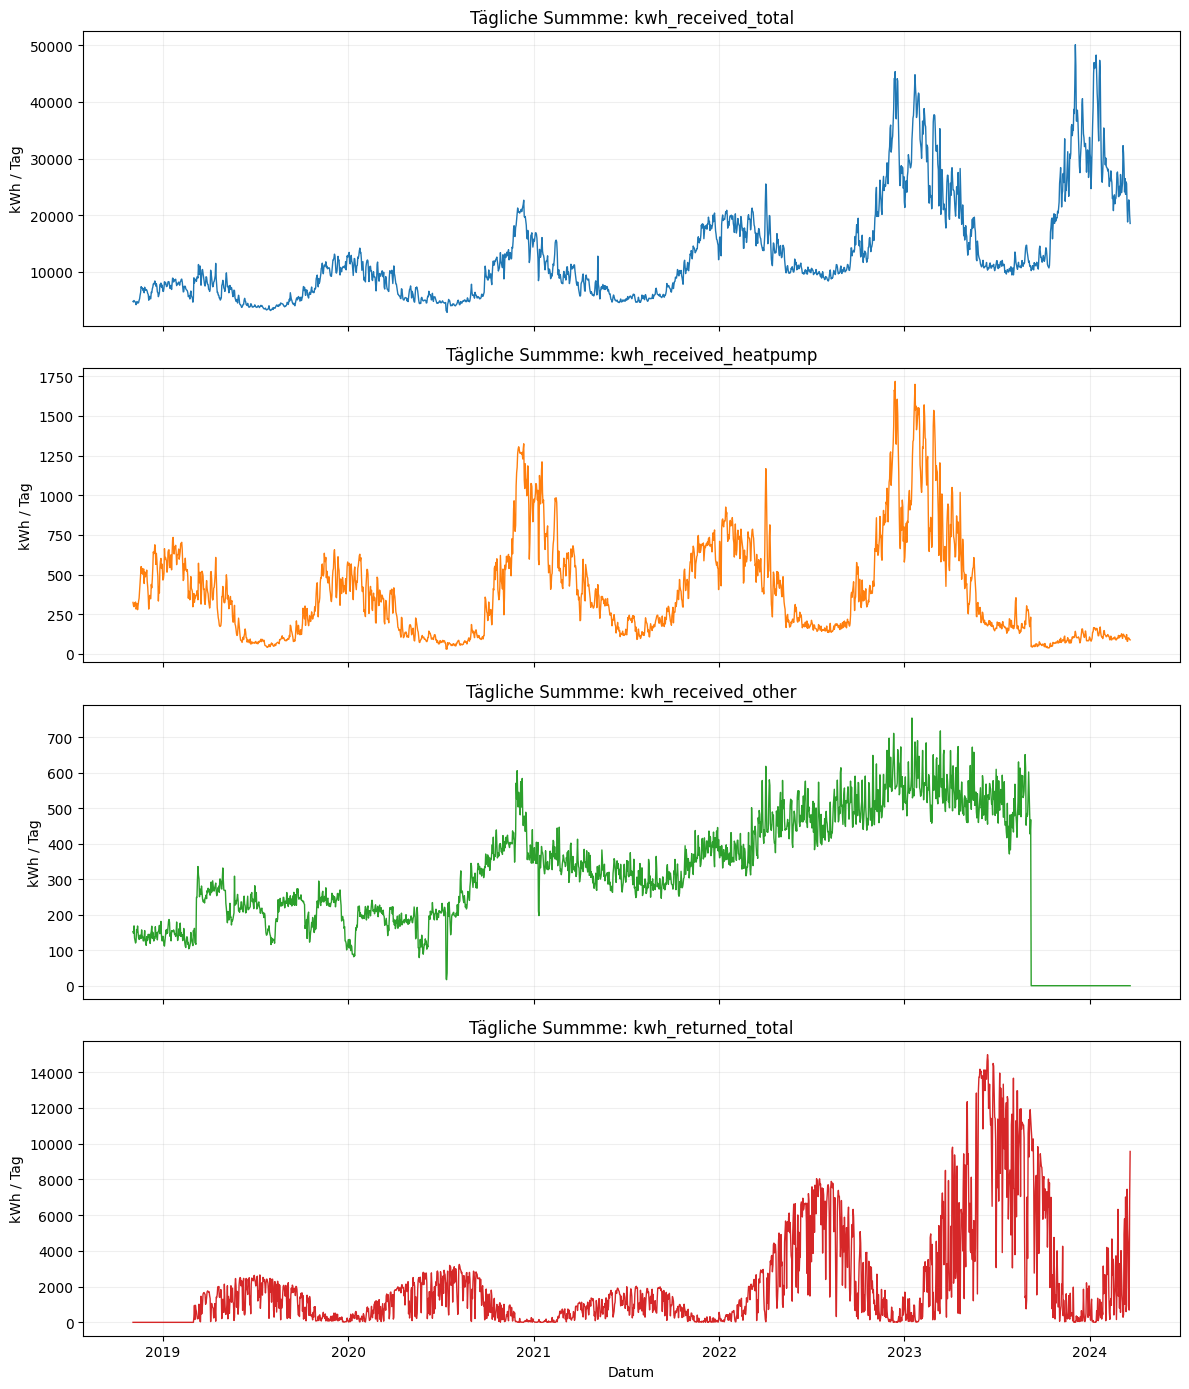

In [3]:

smart_meter = smart_meter.with_columns(
    pl.col("timestamp_local").dt.date().alias("date")
)

smart_meter_sum = (smart_meter.group_by('date').agg([
                                                        pl.col("kwh_received_total").sum(),
                                                        pl.col("kwh_received_heatpump").sum(),
                                                        pl.col("kwh_received_other").sum(),
                                                        pl.col("kwh_returned_total").sum()
                                                        ]).sort("date"))

import matplotlib.pyplot as plt

metrics = ["kwh_received_total", "kwh_received_heatpump", "kwh_received_other", "kwh_returned_total"]
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 14), sharex=True)

for i, col in enumerate(metrics):
    # Polars Series direkt plotten
    axes[i].plot(
        smart_meter_sum["date"], 
        smart_meter_sum[col], 
        color=f"C{i}",
        linewidth=1
    )
    axes[i].set_title(f"Tägliche Summme: {col}", fontsize=12)
    axes[i].set_ylabel("kWh / Tag")
    axes[i].grid(True, alpha=0.2)

plt.xlabel("Datum")
plt.tight_layout()
plt.show()

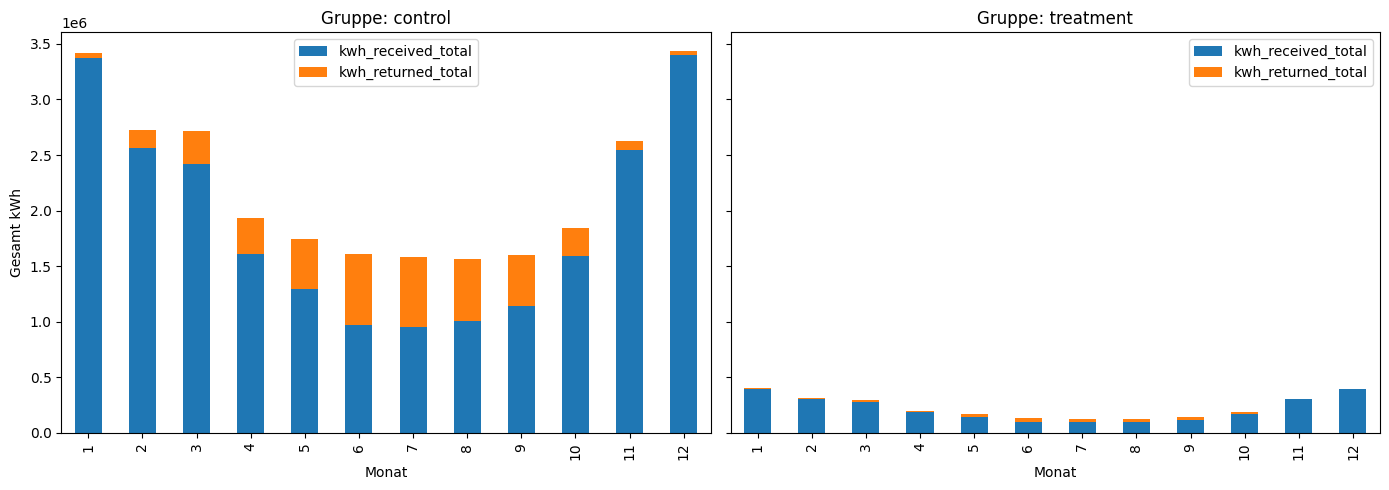

In [4]:
plot_df = (
    smart_meter
    .with_columns(pl.col("date").dt.month().alias("month"))
    .group_by(["group_assignment", "month"])
    .agg([
        pl.col("kwh_received_total").sum(),
        pl.col("kwh_returned_total").sum()
    ])
    .sort("month")
)

# Plotten
groups = plot_df["group_assignment"].unique().to_list()
fig, axes = plt.subplots(1, len(groups), figsize=(14, 5), sharey=True)

for i, group in enumerate(groups):
    # Filter für die aktuelle Gruppe und Umwandlung zu Pandas nur für den Plot
    group_data = plot_df.filter(pl.col("group_assignment") == group).to_pandas()
    
    # Bar-Plot: Received vs Returned
    group_data.set_index("month")[["kwh_received_total", "kwh_returned_total"]].plot(
        kind="bar", 
        stacked=True, 
        ax=axes[i],
        color=["#1f77b4", "#ff7f0e"] # Blau für Bezug, Orange für Rückspeisung
    )
    
    axes[i].set_title(f"Gruppe: {group}")
    axes[i].set_xlabel("Monat")
    axes[i].set_ylabel("Gesamt kWh")

plt.tight_layout()
plt.show()

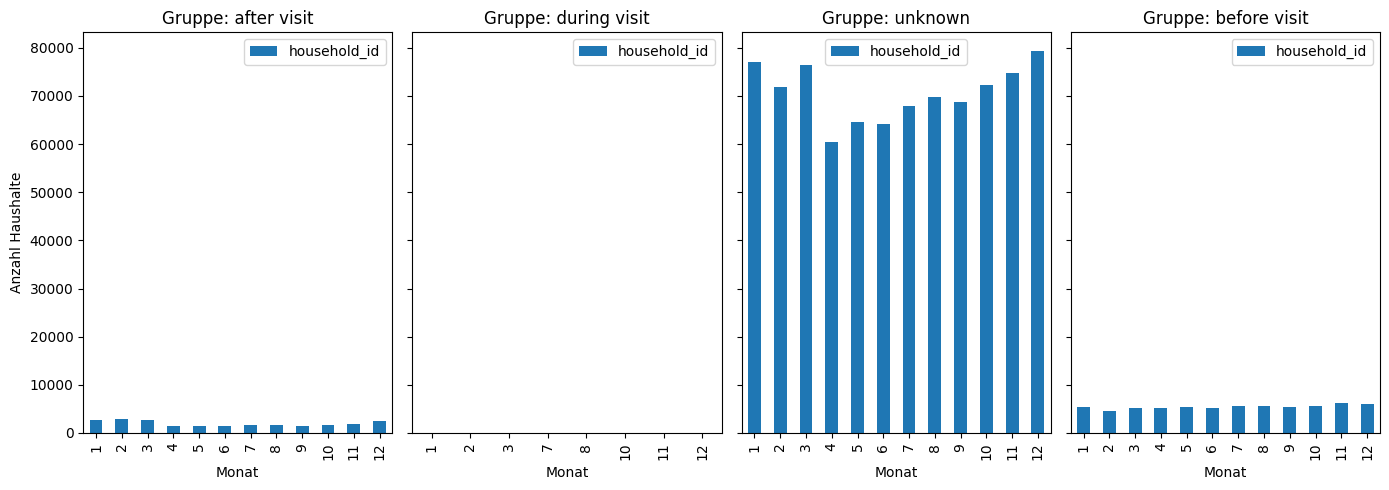

In [5]:
plot_df = (
    smart_meter
    .with_columns(pl.col("date").dt.month().alias("month"))
    .group_by(["affects_timepoint", "month"])
    .agg([
        pl.col("household_id").count(),
    ])
    .sort("month")
)

# Plotten
groups = plot_df["affects_timepoint"].unique().to_list()
fig, axes = plt.subplots(1, len(groups), figsize=(14, 5), sharey=True)

for i, group in enumerate(groups):
    group_data = plot_df.filter(pl.col("affects_timepoint") == group).to_pandas()
    
    group_data.set_index("month")[["household_id"]].plot(
        kind="bar", 
        stacked=True, 
        ax=axes[i],
        color=["#1f77b4", "#ff7f0e"] 
    )
    
    axes[i].set_title(f"Gruppe: {group}")
    axes[i].set_xlabel("Monat")
    axes[i].set_ylabel("Anzahl Haushalte")

plt.tight_layout()
plt.show()

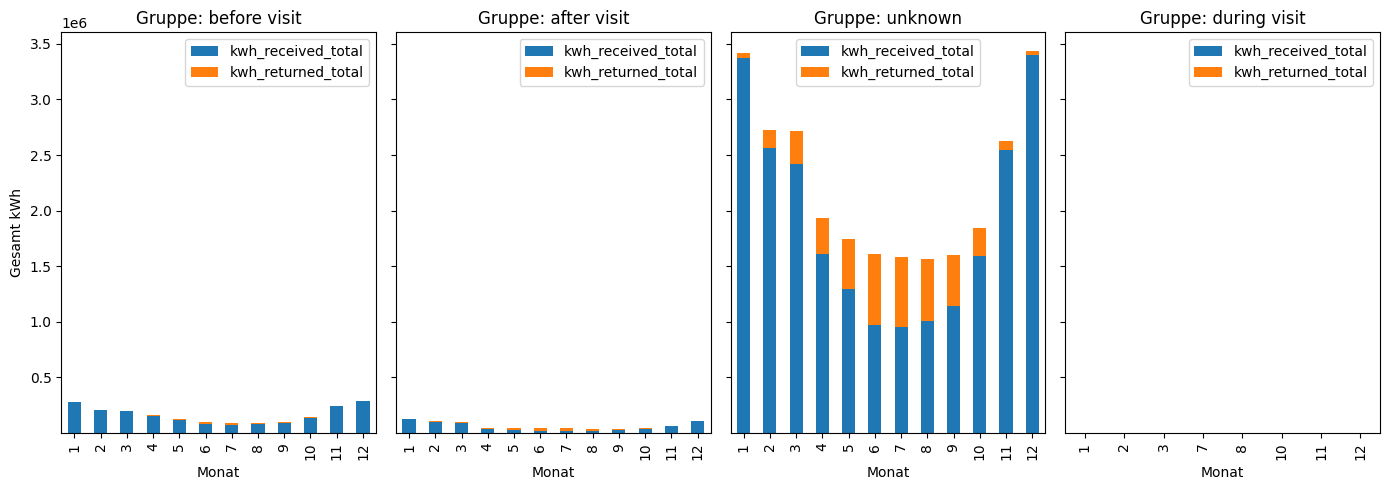

In [6]:
import matplotlib.pyplot as plt


plot_df = (
    smart_meter
    .with_columns(pl.col("date").dt.month().alias("month"))
    .group_by(["affects_timepoint", "month"])
    .agg([
        pl.col("kwh_received_total").sum(),
        pl.col("kwh_returned_total").sum()
    ])
    .sort("month")
)

groups = plot_df["affects_timepoint"].unique().to_list()
fig, axes = plt.subplots(1, len(groups), figsize=(14, 5), sharey=True)

for i, group in enumerate(groups):
    group_data = plot_df.filter(pl.col("affects_timepoint") == group).to_pandas()
    
    group_data.set_index("month")[["kwh_received_total", "kwh_returned_total"]].plot(
        kind="bar", 
        stacked=True, 
        ax=axes[i],
        color=["#1f77b4", "#ff7f0e"] 
    )
    
    axes[i].set_title(f"Gruppe: {group}")
    axes[i].set_xlabel("Monat")
    axes[i].set_ylabel("Gesamt kWh")

plt.tight_layout()
plt.show()

## Explorative Analyse der Wetterdaten

In [7]:
import sys
import os
sys.path.append(os.path.abspath("../src"))
from data_loader import  weather_load

weather_data = weather_load(data_path ='../data/raw/weather')
weather_data.describe()

statistic,date,weather_id,temperature_avg_daily,temperature_max_daily,temperature_min_daily,heatingdegree_sia_daily,heatingdegree_us_daily,coolingdegree_us_daily,humidity_avg_daily,precipitation_total_daily,sunshine_duration_daily,timestamp_local
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""count""","""1885""","""1885""",1885.0,1885.0,1885.0,1885.0,1885.0,1885.0,1885.0,1885.0,1885.0,"""1885"""
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""","""2021-07-31 00:00:00""",null,10.618568,15.594748,5.431406,8.460584,8.196499,0.515066,76.507586,2.662918,5.003289,"""2021-07-31 02:00:00+02:00"""
"""std""",null,null,7.273397,8.74089,6.455998,7.886636,6.517768,1.404647,12.188068,5.645564,4.689027,null
"""min""","""2019-01-01""","""8jB""",-8.3,-5.3,-14.8,0.0,0.0,0.0,42.6,0.0,0.0,"""2019-01-01 01:00:00+01:00"""
"""25%""","""2020-04-16""",null,4.8,8.7,0.0,0.0,1.4,0.0,68.0,0.0,0.4,"""2020-04-16 02:00:00+02:00"""
"""50%""","""2021-07-31""",null,10.4,15.2,5.3,9.6,7.9,0.0,77.9,0.0,3.9,"""2021-07-31 02:00:00+02:00"""
"""75%""","""2022-11-14""",null,16.9,22.7,10.9,15.2,13.5,0.0,86.3,2.8,8.9,"""2022-11-14 01:00:00+01:00"""
"""max""","""2024-02-28""","""8jB""",27.2,36.7,19.2,28.3,26.6,8.9,99.4,53.0,14.9,"""2024-02-28 01:00:00+01:00"""


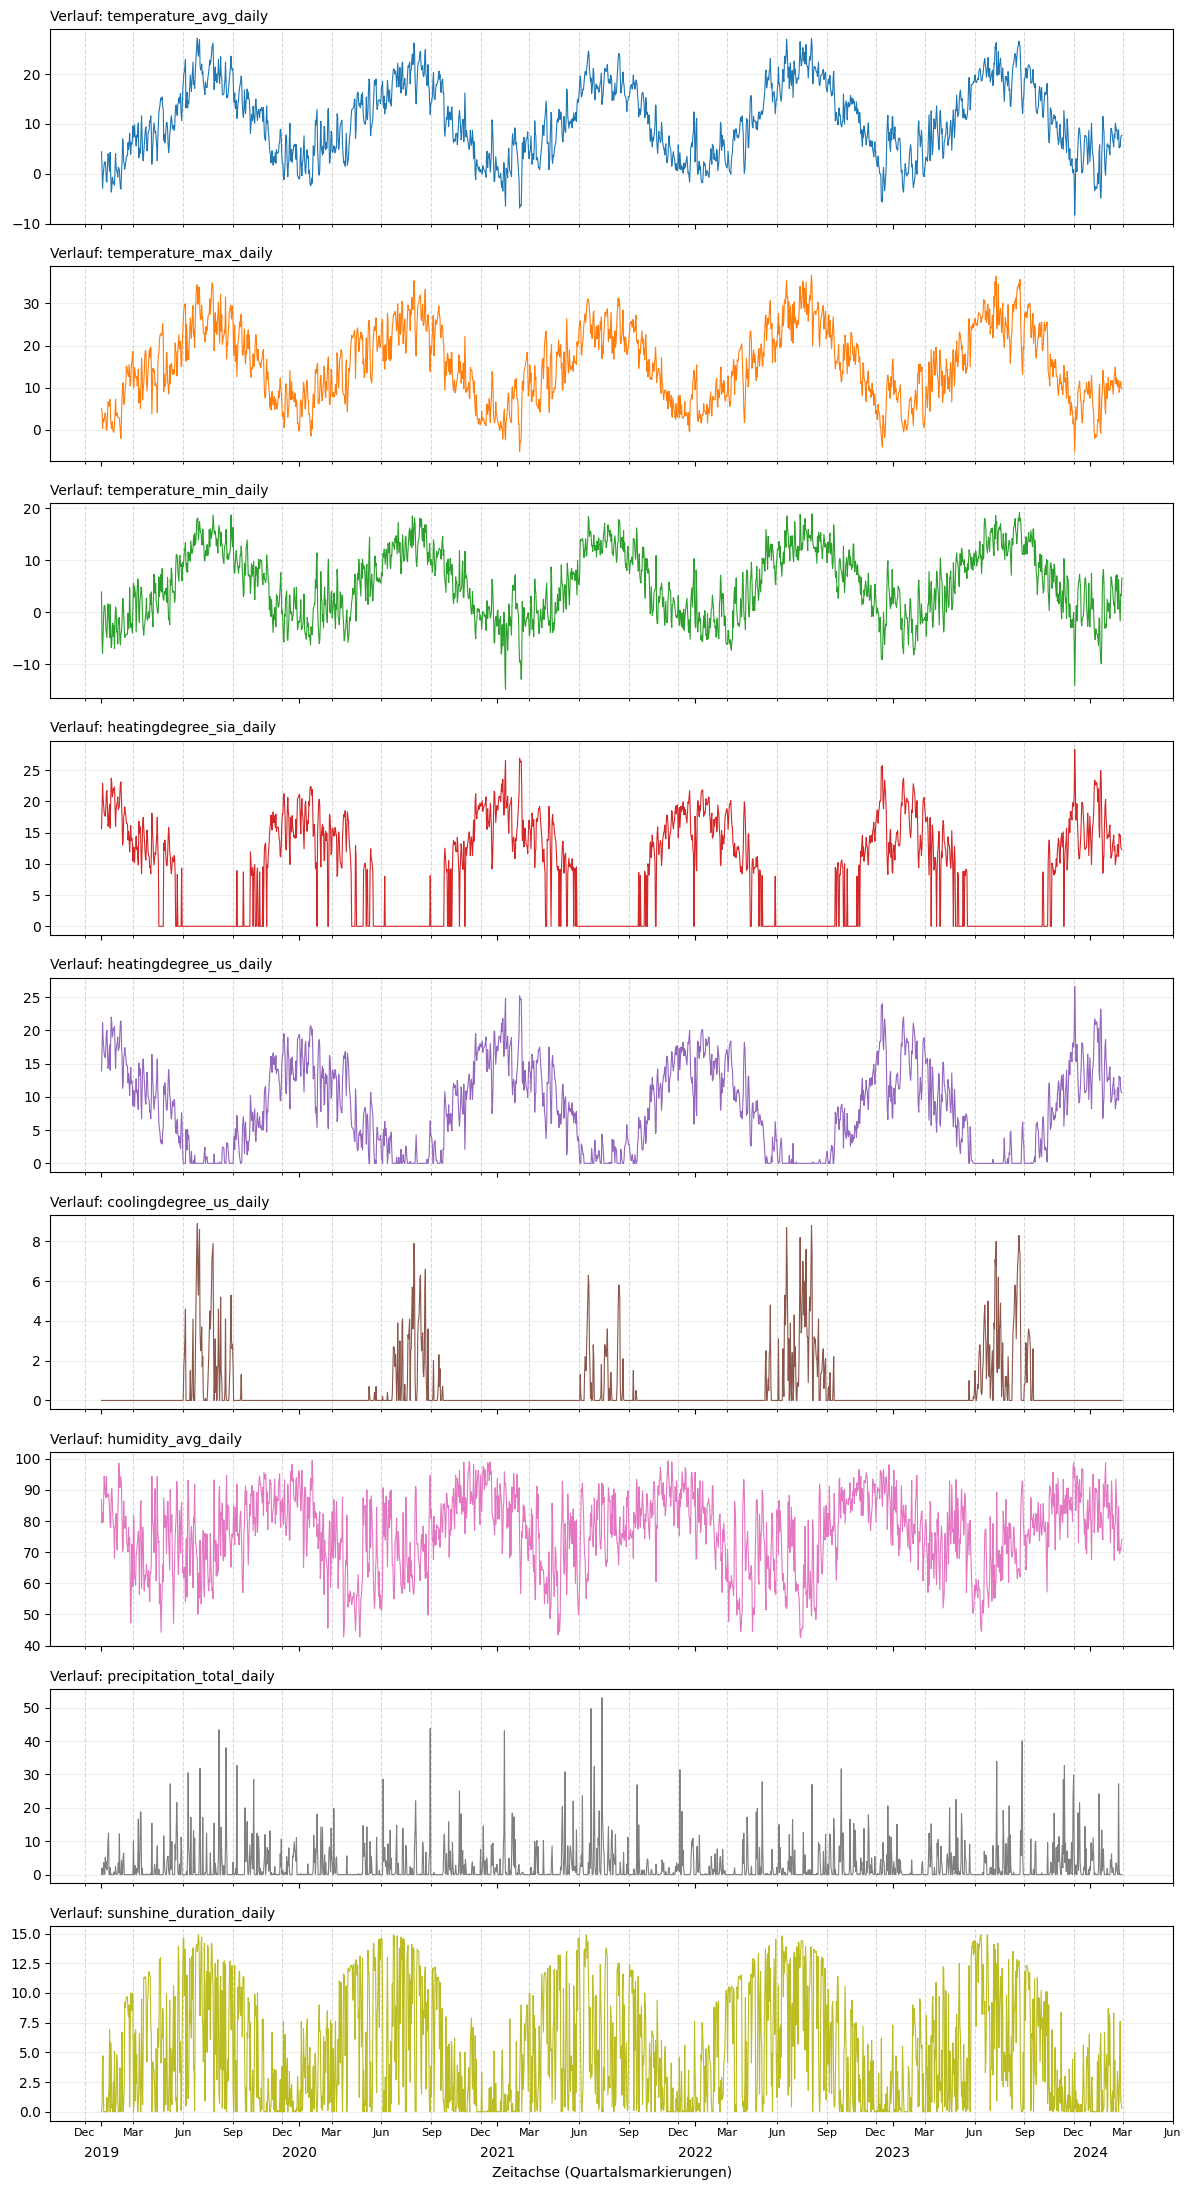

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import polars as pl

# Deine Metriken
metrics = [
    "temperature_avg_daily", "temperature_max_daily", "temperature_min_daily", 
    "heatingdegree_sia_daily", "heatingdegree_us_daily", "coolingdegree_us_daily",
    "humidity_avg_daily", "precipitation_total_daily", "sunshine_duration_daily"
]

fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 22), sharex=True)

for i, col in enumerate(metrics):
    # 1. Daten plotten
    axes[i].plot(
        weather_data["date"], 
        weather_data[col], 
        color=f"C{i}",
        linewidth=0.8,
        label=col
    )


    axes[i].xaxis.set_major_locator(mdates.YearLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('\n%Y')) # Jahr in neuer Zeile
    
    axes[i].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[3, 6, 9, 12]))
    axes[i].xaxis.set_minor_formatter(mdates.DateFormatter('%b')) # %b = Monatskürzel (Mar, Jun, Sep...)

    axes[i].grid(True, which='minor', axis='x', color='gray', linestyle='--', alpha=0.3)
    axes[i].grid(True, which='major', axis='y', alpha=0.2)

    axes[i].set_title(f"Verlauf: {col}", fontsize=10, loc='left')
    axes[i].tick_params(axis='x', which='minor', labelsize=8, rotation=0)

plt.xlabel("Zeitachse (Quartalsmarkierungen)")
plt.tight_layout()
plt.show()

# Explorative Analyse der Technischen Haushaltsdaten

In [17]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

from data_loader import household_load

household_info = household_load(data_path ='../data/raw/households_info/')
household_info.describe()

statistic,household_id,group,weather_id,installation_haspvsystem,protocols_available,protocols_hasmultiplevisits,protocols_reportids,metadata_available,smartmeterdata_available_15min,smartmeterdata_available_daily,smartmeterdata_available_monthly
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64
"""count""",1408.0,"""1408""","""1408""",650.0,1408.0,1408.0,"""214""",1408.0,1408.0,1408.0,1408.0
"""null_count""",0.0,"""0""","""0""",758.0,0.0,0.0,"""1194""",0.0,0.0,0.0,0.0
"""mean""",2.1601e6,null,null,0.793846,0.151989,0.002131,null,0.964489,0.99929,0.921875,0.897727
"""std""",2.9614e6,null,null,null,null,null,null,null,null,null,null
"""min""",1060.0,"""control""","""8jB""",0.0,0.0,0.0,"""[137]""",0.0,0.0,0.0,0.0
"""25%""",412211.0,null,null,null,null,null,null,null,null,null,null
"""50%""",818882.0,null,null,null,null,null,null,null,null,null,null
"""75%""",1.189811e6,null,null,null,null,null,null,null,null,null,null
"""max""",9.981041e6,"""treatment""","""z6I""",1.0,1.0,1.0,"""[40]""",1.0,1.0,1.0,1.0


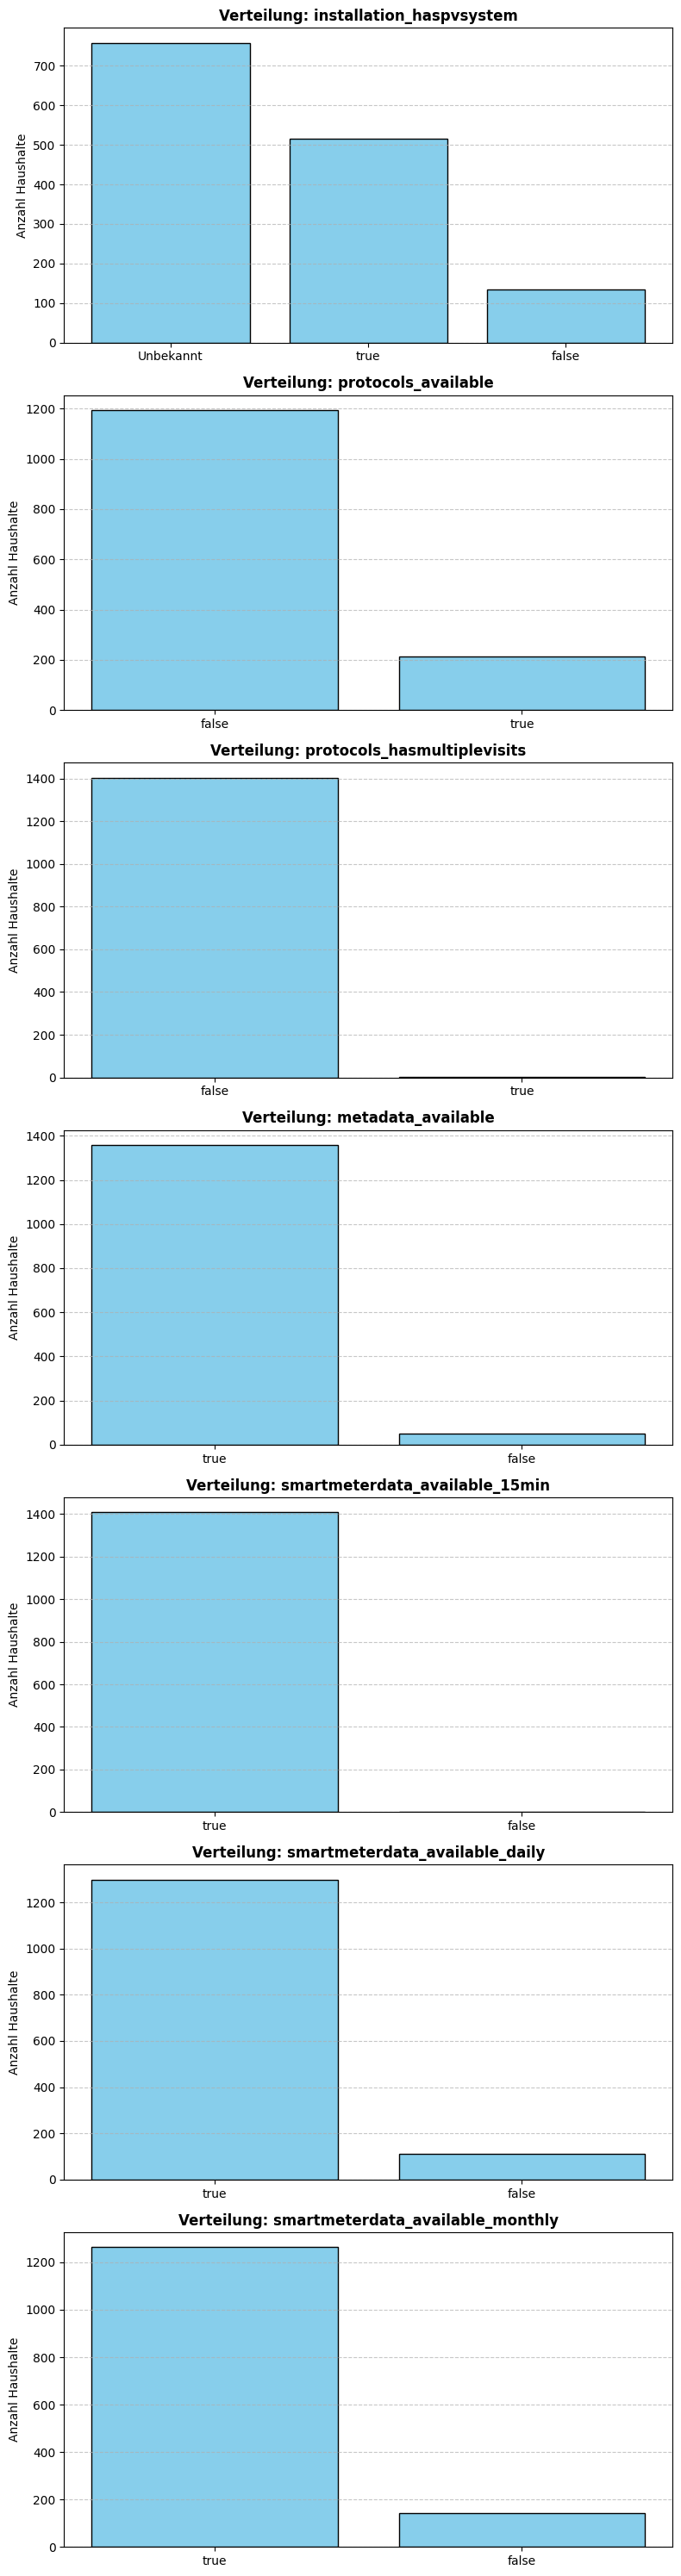

In [10]:
import polars as pl
import matplotlib.pyplot as plt

metrics = [
    "installation_haspvsystem", "protocols_available", "protocols_hasmultiplevisits", 
    "metadata_available", "smartmeterdata_available_15min", 
    "smartmeterdata_available_daily", "smartmeterdata_available_monthly"
]

fig, axes = plt.subplots(len(metrics), 1, figsize=(8, 30))

for i, col in enumerate(metrics):
    counts = (
        household_info[col]
        .fill_null("Unbekannt")
        .value_counts()
        .sort(by="count", descending=True)
    )
    
    x_labels = counts[col].cast(pl.String).to_list()
    y_values = counts["count"].to_list()
    
    axes[i].bar(x_labels, y_values, color="skyblue", edgecolor="black")
    
    axes[i].set_title(f"Verteilung: {col}", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Anzahl Haushalte")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Explorative Analyse der Meta Informationen zum Haushalt

In [13]:
sys.path.append(os.path.abspath("../src"))

import sys
import os
from data_loader import house_info_load


In [16]:
household_info = house_info_load(data_path ='../data/raw/protocols/')
household_info

report_id,household_id,visit_year,visit_date,building_type,building_housingunits,building_constructionyear,building_constructionyear_interval,building_renovated_windows,building_renovated_roof,building_renovated_walls,building_renovated_floor,building_floorareaheated_total,building_floorareaheated_basement,building_floorareaheated_groundfloor,building_floorareaheated_firstfloor,building_floorareaheated_secondfloor,building_floorareaheated_topfloor,building_floorareaheated_additionalareasplanned,building_floorareaheated_additionalareasplannedsize,building_residents,building_pvsystem_available,building_pvsystem_size,building_electricvehicle_available,heatpump_installation_type,heatpump_installation_year,heatpump_installation_manufacturer,heatpump_installation_model,heatpump_installation_heatingcapacity,heatpump_installation_refrigerant_type,heatpump_installation_refrigerant_content,heatpump_installation_normpoint,heatpump_installation_normpoint_cop,heatpump_installation_normpoint_electricpower,heatpump_installation_normpoint_heatingpower,heatpump_installation_location,heatpump_installation_internetconnection,…,heatpump_groundsource_brinecircuit_numberofholes,heatpump_groundsource_brinecircuit_coolingcapacity,heatpump_groundsource_brinecircuit_antifreezeexists,heatpump_groundsource_currentpressure,heatpump_groundsource_currentpressure_okay,heatpump_groundsource_currenttemperature,heatpump_groundsource_currenttemperature_okay,heatpump_heatingcurvesetting_toohigh_beforevisit,heatpump_heatingcurvesetting_changed,heatpump_heatingcurvesetting_outside20_beforevisit,heatpump_heatingcurvesetting_outside0_beforevisit,heatpump_heatingcurvesetting_outsideminus8_beforevisit,heatpump_heatingcurvesetting_outside20_aftervisit,heatpump_heatingcurvesetting_outside0_aftervisit,heatpump_heatingcurvesetting_outsideminus8_aftervisit,heatpump_heatinglimitsetting_toohigh_beforevisit,heatpump_heatinglimitsetting_changed,heatpump_heatinglimitsetting_beforevisit,heatpump_heatinglimitsetting_aftervisit,heatpump_nightsetbacksetting_activated_beforevisit,heatpump_nightsetbacksetting_activated_aftervisit,dhw_temperaturesetting_categorization,dhw_temperaturesetting_changed,dhw_temperaturesetting_beforevisit,dhw_temperaturesetting_aftervisit,dhw_storage_lastdescaling_toolongago,dhw_storage_lastdescaling_year,heatdistribution_expansiontank_pressure_categorization,heatdistribution_expansiontank_pressure_actual,heatdistribution_expansiontank_pressure_target,heatdistribution_expansiontank_systemheight,heatdistribution_circulation_pumpstageposition_changed,heatdistribution_circulation_pumpstageposition_beforevisit,heatdistribution_circulation_pumpstageposition_aftervisit,heatdistribution_recommendation_insulatepipes,heatdistribution_recommendation_installthermostaticvalve,heatdistribution_recommendation_installrpmvalve
i64,i64,date,date,str,f64,f64,str,bool,bool,bool,bool,f64,f64,f64,f64,f64,f64,bool,f64,i64,bool,f64,bool,str,f64,str,str,f64,str,f64,str,f64,f64,str,str,bool,…,f64,f64,bool,f64,bool,f64,bool,bool,bool,f64,f64,f64,f64,f64,f64,bool,bool,f64,f64,bool,bool,str,bool,f64,f64,bool,f64,str,f64,f64,f64,bool,f64,f64,bool,bool,bool
0,null,2015-01-01,null,"""multi family house""",3.0,null,"""1976 - 80""",false,false,false,false,450.0,50.0,220.0,180.0,null,null,null,null,6,null,null,null,"""air-source""",null,"""CTA""","""Aeroheat Aeroplus 2""",27.3,"""R407c""",9.8,null,null,null,null,"""inside""",null,…,null,null,null,null,null,null,null,false,true,20.0,42.0,55.0,null,null,null,true,true,null,17.0,false,false,"""normal""",null,49.5,null,false,2014.0,"""too high""",1.5,1.0,7.0,false,null,null,false,false,false
1,null,2015-01-01,null,"""single family house""",null,1982.0,"""1981 - 85""",false,false,false,false,178.0,null,97.0,81.0,null,null,null,null,3,null,null,null,"""air-source""",null,"""Alpha Innotec""","""LW 150A""",16.0,"""R404a""",5.6,null,null,null,null,"""outside""",null,…,null,null,null,null,null,null,null,false,null,20.0,36.0,44.0,null,null,null,true,nu

In [ ]:
import polars as pl
import matplotlib.pyplot as plt


metrics = [
    'building_renovated_windows', 'building_renovated_roof', 'building_renovated_walls', 
    'building_renovated_floor', 'building_floorareaheated_additionalareasplanned', 
    'building_pvsystem_available', 'building_electricvehicle_available', 
    'heatpump_installation_internetconnection', 'heatdistribution_system_radiators', 
    'heatdistribution_system_floorheating', 'heatdistribution_system_thermostaticvalve', 
    'heatdistribution_system_buffertankavailable', 'dhw_production_byheatpump', 
    'dhw_production_byelectricwaterheater', 'dhw_production_bysolar', 
    'dhw_production_byheatpumpboiler', 'dhw_circulation_notinuse', 
    'dhw_circulation_bytraceheating', 'dhw_circulation_bycirculationpump', 
    'dhw_circulation_switchedbytimer', 'dhw_sterilization_available', 
    'dhw_sterilization_active', 'heatpump_clean', 'heatpump_basicfunctionsokay', 
    'heatpump_technicallyokay', 'heatpump_installation_correctlyplanned', 
    'heatpump_airsource_airductsdistanceokay', 'heatpump_airsource_airductsfree', 
    'heatpump_airsource_airductscleaningrequired', 'heatpump_airsource_airductsdrainokay', 
    'heatpump_airsource_evaporatorclean', 'heatpump_groundsource_brinecircuit_antifreezeexists', 
    'heatpump_groundsource_currentpressure_okay', 'heatpump_groundsource_currenttemperature_okay', 
    'heatpump_heatingcurvesetting_toohigh_beforevisit', 'heatpump_heatingcurvesetting_changed', 
    'heatpump_heatinglimitsetting_toohigh_beforevisit', 'heatpump_heatinglimitsetting_changed', 
    'heatpump_nightsetbacksetting_activated_beforevisit', 'heatpump_nightsetbacksetting_activated_aftervisit', 
    'dhw_temperaturesetting_changed', 'dhw_storage_lastdescaling_toolongago', 
    'heatdistribution_circulation_pumpstageposition_changed', 'heatdistribution_recommendation_insulatepipes', 
    'heatdistribution_recommendation_installthermostaticvalve', 'heatdistribution_recommendation_installrpmvalve'
]

fig, axes = plt.subplots(len(metrics), 1, figsize=(10, len(metrics) * 4))

for i, col in enumerate(metrics):
    # Wir greifen direkt auf die Spalte zu (Series), füllen nulls und zählen dann
    counts = (
        household_info[col]
        .fill_null("Unbekannt")
        .value_counts()
        .sort(by="count", descending=True)
    )
    
    # Da counts nun ein DataFrame mit der Spalte 'col' und 'count' ist:
    x_labels = counts[col].cast(pl.String).to_list()
    y_values = counts["count"].to_list()
    
    axes[i].bar(x_labels, y_values, color="skyblue", edgecolor="black")
    
    axes[i].set_title(f"Verteilung: {col}", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Anzahl Haushalte")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
import polars as pl
import matplotlib.pyplot as plt

# 1. Doppeltes Komma entfernt und Metriken definiert
metrics = [ 
    'building_type', 'building_constructionyear_interval', 'heatpump_installation_type', 
    'heatpump_installation_manufacturer', 'heatpump_installation_model', 
    'heatpump_installation_refrigerant_type', 'heatpump_installation_normpoint', 
    'heatpump_installation_normpoint_heatingpower', 'heatpump_installation_location', 
    'dhw_byheatpump_timeinterval', 'dhw_production_typeofheating', 
    'heatpump_electricityconsumption_categorization', 'heatpump_installation_incorrectlyplanned_categorization', 
    'dhw_temperaturesetting_categorization', 'heatdistribution_expansiontank_pressure_categorization'
]


# Erhöhte Breite und Höhe pro Subplot für bessere Lesbarkeit
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, len(metrics) * 4))

for i, col in enumerate(metrics):
    counts = (
        household_info[col]
        .fill_null("Unbekannt")
        .value_counts()
        .sort(by="count", descending=True)
    )
    
    x_labels = counts[col].cast(pl.String).to_list()
    y_values = counts["count"].to_list()
    
    bars = axes[i].bar(x_labels, y_values, color="skyblue", edgecolor="black", alpha=0.8)
    
    # --- TITEL ANPASSUNG ---
    # 'pad' schiebt den Titel nach oben, weg vom Plot
    axes[i].set_title(f"Verteilung: {col}", fontsize=16, fontweight='bold', pad=25)
    
    axes[i].set_ylabel("Anzahl Haushalte", fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    
    # --- X-ACHSE ANPASSUNG ---
    axes[i].set_xticks(range(len(x_labels)))
    # rotation_mode='anchor' sorgt für eine saubere Ausrichtung der gedrehten Texte
    axes[i].set_xticklabels(x_labels, rotation=45, ha='right', fontsize=11, rotation_mode='anchor')
    
    # Werte über den Balken anzeigen
    axes[i].bar_label(bars, padding=3, fontsize=10)

# 'hspace' steuert den vertikalen Abstand zwischen den Subplots
# 'top' lässt oben Platz für den ersten Titel
plt.subplots_adjust(hspace=0.8, top=0.95)

# Tight_layout mit zusätzlichem Padding
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Deine Liste (ich habe die unnötige Verschachtelung der Liste korrigiert)
metrics = [
    'building_housingunits', 'building_constructionyear', 'building_floorareaheated_total', 
    'building_pvsystem_size', 'heatpump_installation_heatingcapacity', 
    'heatpump_installation_normpoint_cop', 'dhw_temperaturesetting_beforevisit',
    'heatdistribution_expansiontank_pressure_actual'
] 
# Tipp: Ich habe hier nur eine Auswahl genommen, du kannst deine ganze Liste oben einfügen.

# Wir nutzen Seaborn für schönere statistische Plots
sns.set_theme(style="whitegrid")

# Dynamische Erstellung der Subplots
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, len(metrics) * 6))

# Falls nur eine Metrik vorhanden ist, muss axes in eine Liste umgewandelt werden
if len(metrics) == 1:
    axes = [axes]

for i, col in enumerate(metrics):
    # Daten vorbereiten: Null-Werte entfernen, da Histogramme sonst Fehler werfen können
    data = household_info.select(col).drop_nulls().to_series()
    
    if data.len() == 0:
        axes[i].text(0.5, 0.5, f"Keine Daten für {col}", ha='center')
        continue

    # Histogramm mit Kerndichteschätzung (KDE) für die Verteilungskurve
    sns.histplot(data, bins=30, kde=True, ax=axes[i], color="skyblue", edgecolor="black")
    
    # --- TITEL & LABELS ---
    axes[i].set_title(f"Verteilung von: {col}", fontsize=16, fontweight='bold', pad=20)
    axes[i].set_xlabel("Wert", fontsize=12)
    axes[i].set_ylabel("Anzahl Haushalte", fontsize=12)
    
    # Statistische Kennzahlen als Linien einzeichnen (Mittelwert & Median)
    mean_val = data.mean()
    median_val = data.median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Schnitt: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    axes[i].legend()

# Layout optimieren
plt.tight_layout(pad=4.0)
plt.show()